### Step 0: Import Libraries and Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

### Step 1: Exploratory Data Analysis

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As the test set doesn't have the "Survived" column, we can only split the training set to validate the accuracy of the model. Hence, we'll ignore the test set for now, until we want to submit the solution to Kaggle.

In [5]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hickman, Mr. Lewis",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
print(pd.isnull(df_train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### PassengerId

From earlier tables, it's apparent that 'PassengerId' is just the index of the passengers. This should have no bearing on the survival. However, it's quite likely that 'PassengerId' is related to the order which the passengers bought the tickets, and there is an off-chance that this is linked to their survival. Let's plot a graph and see if this is true.

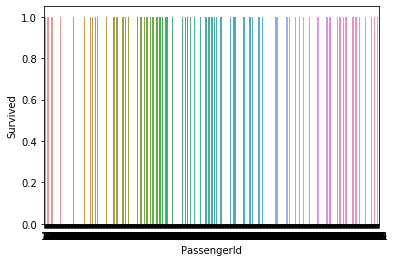

In [9]:
# Examine relationship between 'PassengerID' and 'Survived'
sns.barplot(x='PassengerId',y='Survived', data=df_train, ci=None)

From the barplot above, it looks like there is no perceivable relationship and the 'PassengerId' column can be dropped.

##### Pclass

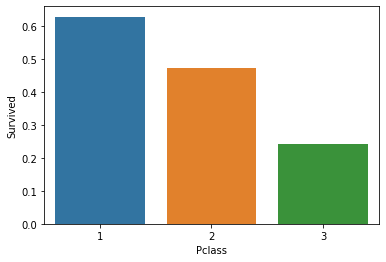

In [10]:
# Examine relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass',y='Survived', data=df_train, ci=None)

It's quite obvious that a disproportionately higher number of passengers from Pclass=1 survived over Pclass=2, and even more so than Pclass=3. Pclass=1 are probably the upper class passengers who were prioritized to board the life boats, while Pclass=3 are probably the lower class or working class passengers.

##### Name

In [11]:
df_train['Name'][0:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [12]:
# create an exploratory dataframe by adding columns to raw dataframe
df_train_binned = df_train.copy(deep=True)

# create a new column by adding "Title" which is extracted from "Name"
df_train_binned['Title'] = df_train_binned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
df_train_binned.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [14]:
df_train_binned['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

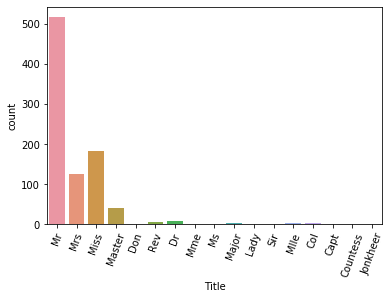

In [15]:
sns.countplot(x='Title', data=df_train_binned)
plt.xticks(rotation=70)

In [16]:
df_train_binned.groupby('Title').Age.mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

It appears that some of the extracted titles are age dependent, for example, "Master" has a mean age of 4.5 years old. This is potentially useful for us to impute the missing "Age" values later.

##### Sex

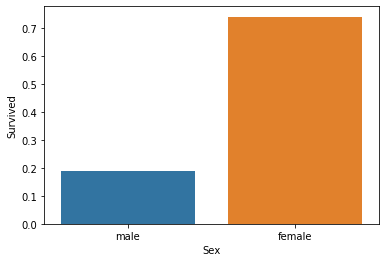

In [17]:
# Examine relationship between 'Sex' and 'Survived'
sns.barplot(x='Sex',y='Survived', data=df_train, ci=None)

As predicted, most females survived while most males perished. Chivalry was alive in the year 1912.

##### Age

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

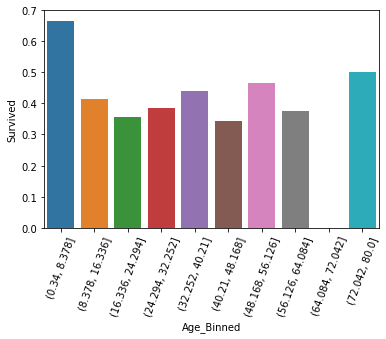

In [18]:
# Examine relationship between 'Age' and 'Survived'

df_train_binned['Age_Binned'] = pd.cut(df_train_binned['Age'], bins=10)
sns.barplot(x=df_train_binned['Age_Binned'], y=df_train_binned['Survived'], estimator = np.mean, ci=None)
plt.xticks(rotation=70)

It looks like significantly more children and slightly more elderly people survived compared to young and middle aged adults. Therefore, "Age" is an important feature. However, it only has 714 non-null data out of 891. Let's see if we can impute the missing data from other info, such as the title in 'Name'.

##### SibSp

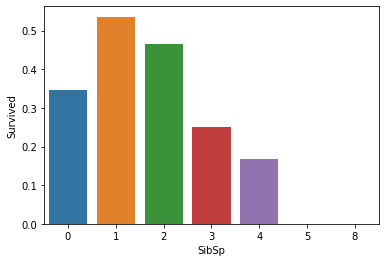

In [19]:
# Examine relationship between 'SibSp' and 'Survived'
sns.barplot(x='SibSp',y='Survived', data=df_train, ci=None)

##### Parch

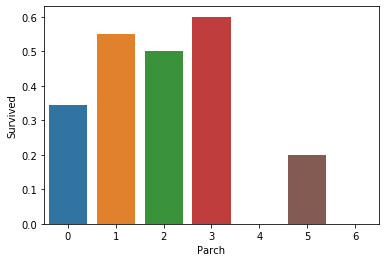

In [20]:
# Examine relationship between 'Parch' and 'Survived'
sns.barplot(x='Parch',y='Survived', data=df_train, ci=None)

There is a definite relationship between "SibSp" and "Survived", as well as "Parch" and "Survived". They do not exhibit the same trend.

##### Ticket

In [21]:
df_train['Ticket'][0:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

On inspection, the data for 'Ticket' appears random, with some having letters in front, and ranging from 1,000's to 100,000's. If anything, the ticket number may be correlated to Pclass, and if that is the case, it is redundant. Either way, we will drop this column.

##### Fare

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

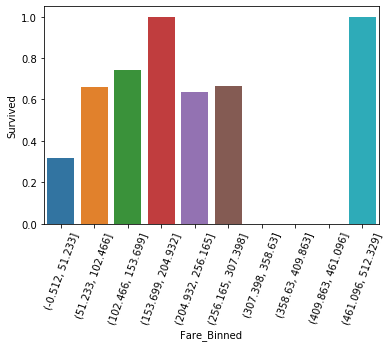

In [22]:
df_train_binned['Fare_Binned'] = pd.cut(df_train_binned['Fare'], bins=10)
sns.barplot(x=df_train_binned['Fare_Binned'], y=df_train_binned['Survived'], estimator = np.mean, ci=None)
plt.xticks(rotation=70)

From the barplot above, quite clearly, all the passengers holding the very expensive tickets survived. The rich were prioritized for survival. However, it's strange that the middle red column all survived too. There are other variables like age or gender that could have affected this.

##### Cabin

Cabin might be an important feature, as some cabins are located closer to the life boats, increasing the chances of survival.

Regretfully, there are only 204 non-null values out of 891 - too many missing values! It's difficult to impute so many values accurately, thus it would be better to drop this column instead.

##### Embarked

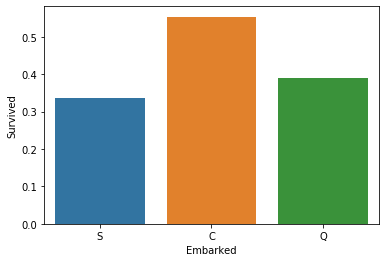

In [23]:
# Examine relationship between 'Embarked' and 'Survived'
sns.barplot(x='Embarked',y='Survived', data=df_train, ci=None)

Titanic's path was: (S) Southampton, England – (C) Cherbourg, France – (Q) Queenstown, Ireland – (Sank before this) New York, USA. From the barplot above, it appears that passengers embarking at Cherbourg, France had much higher survival rates than the rest.

### Step 2. Feature Engineering and Data Cleaning

##### A. Benchmark Model
Here, we'll train a stock random forest model with no custom parameters and minimal cleaning, and report the accuracy. We'll compare the results of the subsequent models to this.

In [42]:
# drop 4 columns as a rough first cut
df_initial = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [43]:
# Eliminate the 2 rows with null values for "Embarked"
df_initial = df_initial[pd.notnull(df_initial['Embarked'])]

# Eliminate the 177 rows with null values for "Age"
df_initial = df_initial[pd.notnull(df_initial['Age'])]

df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [44]:
# encode the categorical labels of "Sex" and "Embarked" by get_dummies()
df_initial_dummies = pd.get_dummies(df_initial)
df_initial_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [45]:
# drop redundant columns such as sex_male 
df_initial_dummies = df_initial_dummies.drop(['Sex_male', 'Embarked_S'], axis=1)
df_initial_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived      712 non-null int64
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Sex_female    712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB


In [46]:
# prepare data for training

# labels
y = df_initial_dummies['Survived']
print(y.shape)

# data
X = df_initial_dummies.drop("Survived", axis=1)
print(X.shape)

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=12, stratify=y)

(712,)
(712, 8)


In [47]:
rf = RandomForestClassifier(random_state=33)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print("Training accuracy: ", rf.score(X_train, y_train))
print("Validation accuracy: ", rf.score(X_valid, y_valid))
print("ROC-AUC score: ", roc_auc_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Training accuracy:  0.9771528998242531
Validation accuracy:  0.7762237762237763
ROC-AUC score:  0.7569979716024341
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        85
           1       0.76      0.66      0.70        58

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.78      0.77       143



C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### B. Feature Importance
Examine the importance of different features.

In [36]:
# First, we'll add a column of random numbers to the dataset
# We can compare the importance of features versus this random feature later
np.random.seed(seed = 10)
X_imp = X
X_imp['random'] = np.random.random(size = len(y))

# Fit a random forest model to this basic dataset
X_imp_train, X_imp_valid, y_imp_train, y_imp_valid = train_test_split(X_imp, y, test_size = 0.2, random_state = 12, stratify=y)
rf.fit(X_imp_train, y_imp_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [37]:
# Use scikit-learn's feature importance feature
df_imp = pd.DataFrame({'feature': X_imp_train.columns, 'feature_importance': rf.feature_importances_}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
df_imp

,feature,feature_importance
0,Sex_female,0.243805
1,Fare,0.202661
2,Age,0.187152
3,random,0.171137
4,Pclass,0.086238
5,SibSp,0.040669
6,Parch,0.036099
7,Embarked_C,0.025716
8,Embarked_Q,0.006522


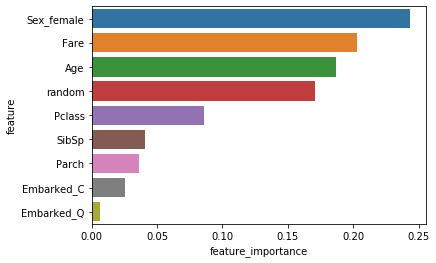

In [38]:
sns.barplot(x = 'feature_importance', y = 'feature', data = df_imp, orient = 'h')

From the feature importance barplot above, it's not surprisingly that the gender, age and fare are important features. It is unexpected thath Pclass and embarked are less important than the random feature since they showed clear distinctions in the EDA previously.

##### C. Feature Engineering - Impute Age from Title

As seen from the feature importance plot above, age is quite an important feature. However, it is missing about 177 rows. This is quite significant out of 891 rows. The model may perform better if we impute the missing Age values instead of dropping all 177 rows. 

In [55]:
df_impute_age = df_train.drop(['PassengerId','Ticket','Cabin'], axis = 1)

# Eliminate the 2 rows with null values for "Embarked"
df_impute_age = df_impute_age[pd.notnull(df_impute_age['Embarked'])]

# create a new column by adding "Title" which is extracted from "Name"
df_impute_age['Title'] = df_impute_age['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# create a series which has mean age for each "Title"
df_title_age = df_impute_age.groupby('Title').Age.median()
print(df_title_age)

# function to replace NaN "Age" with the mean age for corresponding title
def impute_age(cols):
    Age = cols[0]
    Title = cols[1]
    if pd.isnull(Age):
        return df_title_age[Title]
    else:
        return Age

df_impute_age['Age'] = df_impute_age[['Age', 'Title']].apply(impute_age, axis=1)

df_impute_age.tail()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,23.45,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Mr
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Mr


In [56]:
df_impute_age = df_impute_age.drop(['Name','Title'], axis = 1)

# encode the categorical labels of "Sex" and "Embarked" by get_dummies()
df_impute_age_dummies = pd.get_dummies(df_impute_age)

df_impute_age_dummies = df_impute_age_dummies.drop(['Sex_male', 'Embarked_S'], axis=1)

# labels
y = df_impute_age_dummies['Survived']
print(y.shape)

# data
X = df_impute_age_dummies.drop("Survived", axis=1)
print(X.shape)

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=12, stratify=y)

rf = RandomForestClassifier(random_state=33)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print("Training accuracy: ", rf.score(X_train, y_train))
print("Validation accuracy: ", rf.score(X_valid, y_valid))
print("ROC-AUC score: ", roc_auc_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

(889,)
(889, 8)
Training accuracy:  0.9648382559774965
Validation accuracy:  0.8370786516853933
ROC-AUC score:  0.8204545454545454
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178



C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The roc-auc score increased greatly from 75.7% to 82.0%. Is this because of the increased amount of data (889 vs 714), or becuase of the age values deduced from title, or both? We can impute random ages to see which is the more significant contributor.

In [57]:
df_impute_rand_age = df_train.drop(['PassengerId','Ticket','Cabin'], axis = 1)

# Eliminate the 2 rows with null values for "Embarked"
df_impute_rand_age = df_impute_rand_age[pd.notnull(df_impute_rand_age['Embarked'])]


# function to replace NaN "Age" with the mean age for corresponding title
def impute_rand_age(cols):
    Age = cols[0]
    if pd.isnull(Age):
        # random age between the min and max age in the dataframe
        return np.random.randint(0.42, 80)
    else:
        return Age

df_impute_rand_age['Age'] = df_impute_rand_age[['Age']].apply(impute_rand_age, axis=1)

In [58]:
df_impute_rand_age = df_impute_rand_age.drop(['Name'], axis = 1)

# encode the categorical labels of "Sex" and "Embarked" by get_dummies()
df_impute_rand_age_dummies = pd.get_dummies(df_impute_rand_age)

df_impute_rand_age_dummies = df_impute_rand_age_dummies.drop(['Sex_male', 'Embarked_S'], axis=1)

# labels
y = df_impute_rand_age_dummies['Survived']
print(y.shape)

# data
X = df_impute_rand_age_dummies.drop("Survived", axis=1)
print(X.shape)

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=12, stratify=y)

rf = RandomForestClassifier(random_state=33)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print("Training accuracy: ", rf.score(X_train, y_train))
print("Validation accuracy: ", rf.score(X_valid, y_valid))
print("ROC-AUC score: ", roc_auc_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

(889,)
(889, 8)
Training accuracy:  0.9760900140646976
Validation accuracy:  0.8089887640449438
ROC-AUC score:  0.7949197860962567
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Experiment Results**: 

- ROC-AUC, first cut model: 75.7%
- ROC-AUC, imputed age from titles: 82.0%
- ROC-AUC, imputed age randomly: 79.5%

It looks like both the additional rows of data and the age imputed from title played a role in improving the accuracy, and we should definitely keep this engineered feature.

##### D. Feature Engineering - Family Size

In [60]:
df_fam_size_dummies = df_impute_age_dummies.copy(deep=True)
df_fam_size_dummies['FamSize'] = df_fam_size_dummies['SibSp'] + df_fam_size_dummies['Parch']
df_fam_size_dummies = df_fam_size_dummies.drop(['SibSp','Parch'], axis = 1)
df_fam_size_dummies.head()

,Survived,Pclass,Age,Fare,Sex_female,Embarked_C,Embarked_Q,FamSize
0,0,3,22.0,7.2500,0,0,0,1
1,1,1,38.0,71.2833,1,1,0,1
2,1,3,26.0,7.9250,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,0,0,0


In [61]:
# labels
y = df_fam_size_dummies['Survived']
print(y.shape)

# data
X = df_fam_size_dummies.drop("Survived", axis=1)
print(X.shape)

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=12, stratify=y)

rf = RandomForestClassifier(random_state=33)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print("Training accuracy: ", rf.score(X_train, y_train))
print("Validation accuracy: ", rf.score(X_valid, y_valid))
print("ROC-AUC score: ", roc_auc_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

(889,)
(889, 7)
Training accuracy:  0.9648382559774965
Validation accuracy:  0.8146067415730337
ROC-AUC score:  0.8050802139037433
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.76      0.76        68

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178



C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Experiment Results:**

Validation accuracy and ROC-AUC score decreased, we should drop this feature then.

##### Revisit Feature Importance

In [62]:
# labels
y = df_impute_age_dummies['Survived']
print(y.shape)

# data
X = df_impute_age_dummies.drop("Survived", axis=1)
print(X.shape)

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=12, stratify=y)

rf = RandomForestClassifier(random_state=33)

rf.fit(X_train, y_train)

(889,)
(889, 8)


C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

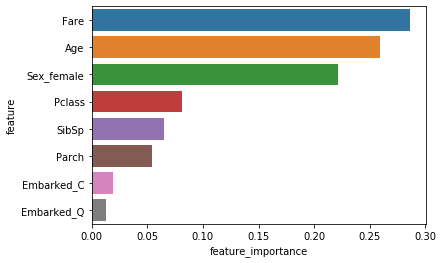

In [63]:
df_imp = pd.DataFrame({'feature': X_train.columns, 'feature_importance': rf.feature_importances_}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
sns.barplot(x = 'feature_importance', y = 'feature', data = df_imp, orient = 'h')

The feature importance of "Age" has increased significantly since imputation, as inferred from the chart above as well as the improved ROC-AUC score after imputation of the "Age" column.

### Step 3: Model Tuning

Here, we'll plot the `oob_score` against Random Forest hyperparameters such as `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. We set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up the training process.

In [64]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

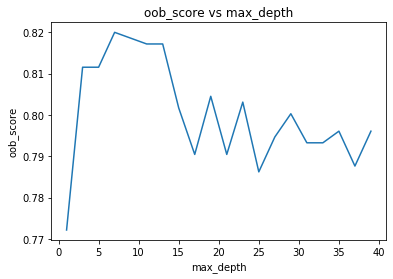

In [65]:
oob_score = []
max_depth = []

for i in range(1, 41, 2):
    rf = RandomForestClassifier(n_estimators=100,max_depth=i, oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_score.append(rf.oob_score_)
    max_depth.append(i)

plt.plot(max_depth, oob_score)
plt.title("oob_score vs max_depth")
plt.ylabel("oob_score")
plt.xlabel("max_depth")
plt.show()

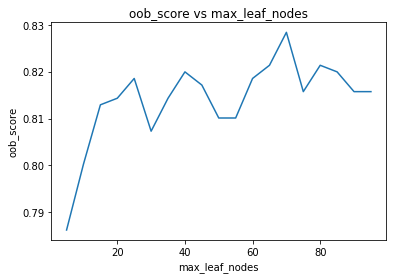

In [66]:
oob_score = []
max_leaf_nodes = []

for i in range(5, 100, 5):
    rf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=i, oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_score.append(rf.oob_score_)
    max_leaf_nodes.append(i)

plt.plot(max_leaf_nodes, oob_score)
plt.title("oob_score vs max_leaf_nodes")
plt.ylabel("oob_score")
plt.xlabel("max_leaf_nodes")
plt.show()

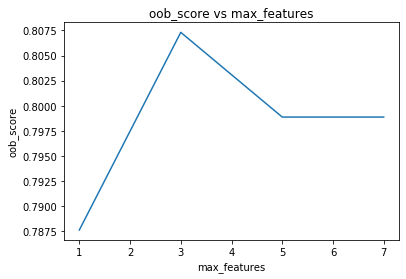

In [67]:
oob_score = []
max_features = []

for i in range(1, 8, 2):
    rf = RandomForestClassifier(n_estimators=100,max_features=i, oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_score.append(rf.oob_score_)
    max_features.append(i)

plt.plot(max_features, oob_score)
plt.title("oob_score vs max_features")
plt.ylabel("oob_score")
plt.xlabel("max_features")
plt.show()

C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


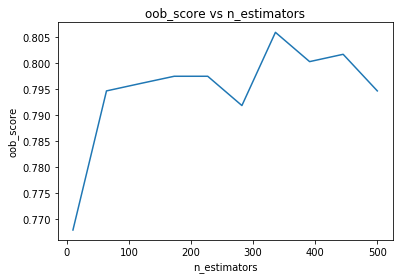

In [68]:
oob_score = []
n_estimators = []

for i in np.linspace(10, 500, 10):
    rf = RandomForestClassifier(n_estimators=int(i), oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_score.append(rf.oob_score_)
    n_estimators.append(int(i))

plt.plot(n_estimators, oob_score)
plt.title("oob_score vs n_estimators")
plt.ylabel("oob_score")
plt.xlabel("n_estimators")
plt.show()

### Step 3: Final Model

We've narrowed down a suitable range for the hyperparameters of the Random Forest model. Now, we'll use `GridSearchCV` to choose the best hyperparameters of the lot, with cross validation.

In [69]:
rf = RandomForestClassifier(random_state=33)

rf_params = {'max_depth':range(4,12,3),
              'max_leaf_nodes':range(30,90,10),
              'max_features':range(1,8,2),
              'n_estimators':(np.linspace(100,500,10)).astype(int)}

#rf_params = {'n_estimators':(np.linspace(100,500,10)).astype(int)}
gs = GridSearchCV(rf, param_grid=rf_params)

gs.fit(X_train, y_train)
y_pred = gs.predict(X_valid)
print("Tuned hyperparameters: ", gs.best_params_)
print("Training accuracy: ", gs.score(X_train, y_train))
print("Validation accuracy: ", gs.score(X_valid, y_valid))
print("ROC-AUC score: ", roc_auc_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

C:\Users\leepi\Anaconda3\envs\aiap\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Tuned hyperparameters:  {'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 50, 'n_estimators': 233}
Training accuracy:  0.9212376933895922
Validation accuracy:  0.8764044943820225
ROC-AUC score:  0.8606951871657753
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       110
           1       0.87      0.79      0.83        68

    accuracy                           0.88       178
   macro avg       0.88      0.86      0.87       178
weighted avg       0.88      0.88      0.88       178



The ROC-AUC score improved from the initial benchmark model of 75.7% to **86.1%**! Looks like the feature engineering and hyperparameter optimisation worked out. There is a corresponding improvement in the precision, recall and f1-score as well. 

### Step 4: Kaggle Submission

On my to-do list! Let's see if this model is generalised or overfitted to the training data.